In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, \
f1_score, ndcg_score, precision_score, average_precision_score, precision_recall_curve

In [2]:
results = np.load('prediction_result_shuffle16.npz')
results['y_true'], results['y_pred']

(array([1, 1, 1, ..., 0, 0, 0]),
 array([0.937154  , 0.8484183 , 0.680019  , ..., 0.00550778, 0.02256701,
        0.01148001], dtype=float32))

In [3]:
y_true = results['y_true']
y_pred = results['y_pred']
sorted_ind = np.argsort(y_pred)[::-1]
sorted_y_true = y_true[sorted_ind]
sorted_y_pred = np.zeros_like(sorted_y_true)
sorted_y_true, sorted_y_pred

(array([1, 1, 1, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

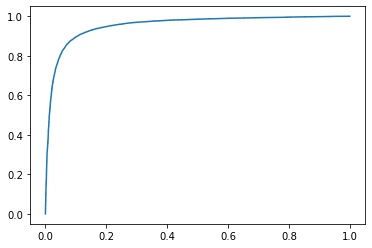

In [4]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
np.savez('GAT_roc_curve.npz', fpr=fpr, tpr=tpr, thresholds=thresholds)
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
np.savez('GAT_pr_curve.npz', precision=precision, recall=recall, thresholds=thresholds)
plt.plot(fpr, tpr)
plt.show()
sorted_y_pred = np.zeros_like(sorted_y_true)
for i in range (24062):
    if(y_pred[i] >= thresholds[i]):
       sorted_y_pred[i] = 1

In [5]:
auc = roc_auc_score(y_true, y_pred)
precision = average_precision_score(y_true,y_pred)
acc = accuracy_score(y_true, sorted_y_pred)
recall = recall_score(y_true, sorted_y_pred)
f1value = 2*acc*recall/(acc+recall)

auc,precision,acc,recall,f1value

(0.9539252700049348,
 0.9508705517416824,
 0.9507529429750803,
 0.9015058859501606,
 0.9254747347311104)